# Importing Requried Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Reading DataSet From Github

In [4]:
link = "https://raw.githubusercontent.com/Rajkumar2002-Rk/Python-Mid-Term/main/Book_ipl22_ver_33.csv"

In [5]:
data = pd.read_csv(link)

# Exploring the data set

In [6]:
data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [7]:
# Dimensions of data set
data.shape

(74, 20)

In [8]:
# getting info of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [9]:
data.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

## Counting Missing Values in Dataset

In [10]:
data.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

# Exploratory Analysis and Visualization
## Team Performance Analysis

In [11]:
# Number of Matches Played by team-1
data['team1'].value_counts()

Banglore     16
Chennai      12
Delhi        12
Gujarat      10
Hyderabad     7
Kolkata       7
Lucknow       6
Mumbai        3
Punjab        1
Name: team1, dtype: int64

In [12]:
# Number of Matches Played by team-2
data['team2'].value_counts()

Rajasthan    17
Punjab       13
Mumbai       11
Lucknow       9
Kolkata       7
Hyderabad     7
Gujarat       6
Chennai       2
Delhi         2
Name: team2, dtype: int64

In [13]:
# Calculating Number Of Matches Played by Each Team
data['team1'].value_counts() + data['team2'].value_counts()

Banglore      NaN
Chennai      14.0
Delhi        14.0
Gujarat      16.0
Hyderabad    14.0
Kolkata      14.0
Lucknow      15.0
Mumbai       14.0
Punjab       14.0
Rajasthan     NaN
dtype: float64

In [14]:
## Handlingthe NaN Values in Total Match Calculations
total_matches_played = data['team1'].value_counts().add(data['team2'].value_counts(), fill_value=0).astype(int)
total_matches_played

Banglore     16
Chennai      14
Delhi        14
Gujarat      16
Hyderabad    14
Kolkata      14
Lucknow      15
Mumbai       14
Punjab       14
Rajasthan    17
dtype: int64

In [15]:
# Calculate the total matches won by each team
total_won= data['match_winner'].value_counts()

total_won

Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: match_winner, dtype: int64

In [16]:
# Calculate the win percentage for each team
win_percentage = ((total_won / total_matches_played) * 100).sort_values(ascending=False).astype(int)

win_percentage

Gujarat      75
Lucknow      60
Rajasthan    58
Banglore     56
Delhi        50
Punjab       50
Hyderabad    42
Kolkata      42
Chennai      28
Mumbai       28
dtype: int64

# Creating a DataFrame to store team performance data
### Sorting the DataFrame by win percentage in descending order

In [17]:
team_performance = pd.DataFrame({
    'Total Matches Played': total_matches_played,
    'Total Matches Won': total_won,
    'Win Percentage (%)': win_percentage
}).sort_values(by='Win Percentage (%)', ascending=False)

In [18]:
team_performance

,Total Matches Played,Total Matches Won,Win Percentage (%)
Gujarat,16,12,75
Lucknow,15,9,60
Rajasthan,17,10,58
Banglore,16,9,56
Delhi,14,7,50
Punjab,14,7,50
Hyderabad,14,6,42
Kolkata,14,6,42
Chennai,14,4,28
Mumbai,14,4,28


# Visulaize the team performance in Bar Chart

In [19]:
px.bar(
    team_performance, x=team_performance.index, y=['Total Matches Played', 'Total Matches Won'],
    text_auto=True, barmode='group', title='Team Performance in IPL 2022',
    labels={'index':'IPL Team'},color_discrete_map={'Total Matches Played': 'lightblue', 'Total Matches Won': 'blue'}
).update_layout(
    legend_title_text='Performance',yaxis_title='Match Counts Played & Won')

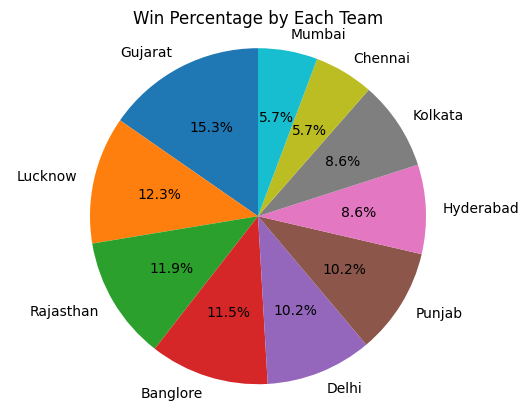

In [20]:
fig, ax = plt.subplots()
ax.pie(win_percentage, labels=win_percentage.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Win Percentage by Each Team')
ax.axis('equal')
plt.show()


# Best Player of the match

In [21]:
data.groupby('player_of_the_match')['match_id'].count().sort_values(ascending=False)[:10]

player_of_the_match
Kuldeep Yadav       4
Jos Buttler         3
Umesh Yadav         2
Rahul Tripathi      2
Shubman Gill        2
K L Rahul           2
Quinton de Kock     2
Jasprit Bumrah      2
Hardik Pandya       2
Yuzvendra Chahal    2
Name: match_id, dtype: int64

## Plotting Best Player of the match

In [22]:
pom = data.groupby('player_of_the_match')['match_id'].count().sort_values(ascending=False)[:10]

px.bar(pom, y ='match_id', text='match_id',
       title='Most Player of the match award', color='match_id',
      labels={'match_id':'Match Counts'}).update_traces(textfont_size=20)



## Toss Analysis

In [23]:
data['toss_winner'].value_counts()

Gujarat      10
Hyderabad    10
Mumbai        9
Kolkata       8
Delhi         8
Banglore      8
Lucknow       7
Chennai       6
Punjab        4
Rajasthan     4
Name: toss_winner, dtype: int64

## visualization for toss analysis

In [24]:
x = data['toss_winner'].value_counts().keys()
y = data['toss_winner'].value_counts()

px.bar(data, x=x, y =y, text=y, color=y,
       title='Most Toss Winner Team',
      labels={'x':'Toss Winner', 'y':'Match Count'}).update_traces(textfont_size=20)

# Percentage of Team winning the Toss also Winning the Match

In [25]:
# Finding out how many times a team has won the match after winning the Toss

toss_match_won = data[data['toss_winner'] == data['match_winner']]['match_winner'].value_counts()
toss_match_won

Gujarat      7
Kolkata      5
Hyderabad    5
Delhi        4
Banglore     4
Lucknow      4
Mumbai       3
Rajasthan    2
Punjab       1
Chennai      1
Name: match_winner, dtype: int64

In [27]:
# calculating the total matches won
match_won = data['match_winner'].value_counts()
match_won

Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: match_winner, dtype: int64

In [29]:
# Calculate the percentage of matches won when the team wins both the toss and the match
percentage_won = (toss_match_won / match_won * 100).astype(int).sort_values(ascending=False)
percentage_won

Hyderabad    83
Kolkata      83
Mumbai       75
Gujarat      58
Delhi        57
Banglore     44
Lucknow      44
Chennai      25
Rajasthan    20
Punjab       14
Name: match_winner, dtype: int64

## Visualization the % of Matches won by teams when they win both the Toss and the Match

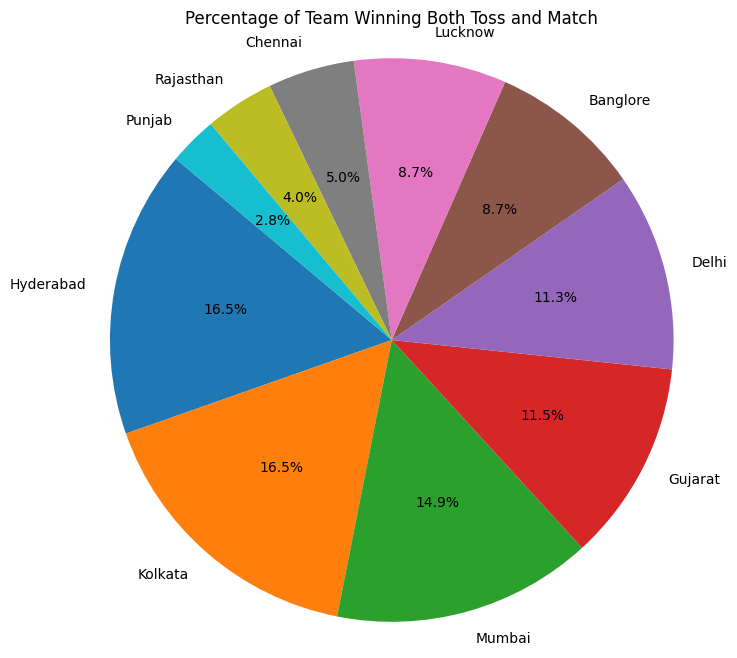

In [30]:
teams = percentage_won.index
percentages = percentage_won.values
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=teams, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Team Winning Both Toss and Match')
plt.axis('equal')
plt.show()


# Batting and Bowling Analysis

In [31]:
# Counting the number of matches won by each winning method (Runs, Wickets)
data["won_by"].value_counts()

Wickets    37
Runs       37
Name: won_by, dtype: int64

## Plotting the insight in pie chart

In [38]:
v = data["won_by"].value_counts()

fig= px.pie(data, values= v,
            names=['Defender Won','Chaser Won'],
            title='Number of Matches won by defending or chasing')

fig.update_traces(textposition='inside',textinfo='percent+label+value',textfont_size=20)

fig.show()

# Defender winning margin Data Distribution

In [35]:
# Retrieving and sorting the margin of victory values for matches won by Runs in descending order

data[data['won_by']=='Runs']['margin'].sort_values(ascending=False).values

array([91, 75, 67, 62, 61, 54, 54, 54, 52, 44, 37, 36, 29, 24, 23, 23, 21,
       20, 18, 18, 17, 16, 15, 14, 14, 13, 13, 12, 12, 11,  8,  7,  6,  5,
        3,  3,  2])

In [36]:
# Generating descriptive statistics for the margin of victory in matches won by Runs

data[data['won_by'] == 'Runs']['margin'].describe().astype(int)

count    37
mean     27
std      23
min       2
25%      12
50%      18
75%      44
max      91
Name: margin, dtype: int64

# Plotting the Batting Fist Win marging distribution

In [37]:
Defender = data[data['won_by']=='Runs']
px.histogram(Defender, x="margin", text_auto=True)

# Best Bowlers in IPL 2022

In [39]:
bowler = data.groupby('best_bowling')['match_id'].count().sort_values(ascending=False)[:10]
bowler

best_bowling
Yuzvendra Chahal     5
Rashid Khan          4
Kuldeep Yadav        3
T Natarajan          3
Avesh Khan           3
Jasprit Bumrah       3
Josh Hazlewood       3
Kagiso Rabada        3
Wanindu Hasaranga    2
Umran Malik          2
Name: match_id, dtype: int64

In [41]:
fig = px.scatter(bowler, y='match_id', color='match_id',
                 title='Best Bowler in IPL 2022',
                 labels={'match_id': 'Match count'})
fig.update_traces(textfont_size=20)

fig.show()


#Venue Analysis

In [42]:
# Count the number of matches hosted at each venue
data['venue'].value_counts()

Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: venue, dtype: int64

# Plotting Venue Analysis

In [47]:
x = data['venue'].value_counts().keys()
y = data['venue'].value_counts()
px.bar(data, x=y, y=x,text=y, color=y,
       title='Venue Hosted Most Matches')